<a href="https://colab.research.google.com/github/YoneDelCastillo/TFG-Ec.-Maxwell-no-lineales./blob/main/TFG_1D_lineal_homogeneo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#MODULOS DE PYTHON

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
import matplotlib.animation as animation

In [68]:
#DEFINICION DE VARIABLES Y PARAMETROS

#Número de puntos espaciales
L = 1
dx = 0.01

Nx = int(L/dx)+1

#Número de intervalos temporales
T = 2.5
dt = 0.0001

Nt = int(T/dt)+1

# σ/ε = a
a = 1
# σ*/μ = b
b = 1
# ε
e = 1
# μ
u = 1

#Definicion de los campos
x  = np.zeros((Nx))
Ey = np.zeros((Nx,Nt))
Hz = np.zeros((Nx,Nt))

#Condiciones iniciales
def Gauss(x,a,b,c):
  y = a*np.exp(-(x-b)**2/(2*c**2))
  return y

#Imponemos las condiciones iniciales a Ey y Hz
for i in np.arange(0,Nx):
  x[i]    = i*dx
  Ey[i,0] = Gauss(i*dx,1,0.5*L,0.05)
  Hz[i,0] = Gauss(i*dx,1,0.5*L,0.05)


In [69]:
#ALGORITMO DE YEE

for n in np.arange(0,Nt-1):
  #Contorno izq.
  Hz[0,n+1] = (1-0.5*b*dt)/(1+0.5*b*dt)*Hz[0,n] + ((dt/u)/(1+0.5*b*dt))*(Ey[0,n]-Ey[0+1,n])/dx
  Ey[0,n+1] = (1-0.5*a*dt)/(1+0.5*a*dt)*Ey[0,n] + ((dt/e)/(1+0.5*a*dt))*(-Hz[0,n])/dx
  for i in np.arange(1,Nx-1):
    Hz[i,n+1] = (1-0.5*b*dt)/(1+0.5*b*dt)*Hz[i,n] + ((dt/u)/(1+0.5*b*dt))*(Ey[i,n]-Ey[i+1,n])/dx
    Ey[i,n+1] = (1-0.5*a*dt)/(1+0.5*a*dt)*Ey[i,n] + ((dt/e)/(1+0.5*a*dt))*(Hz[i-1,n]-Hz[i,n])/dx
  #Contorno der.
  Hz[Nx-1,n+1] = (1-0.5*b*dt)/(1+0.5*b*dt)*Hz[Nx-1,n] + ((dt/u)/(1+0.5*b*dt))*(Ey[Nx-1,n])/dx
  Ey[Nx-1,n+1] = (1-0.5*a*dt)/(1+0.5*a*dt)*Ey[Nx-1,n] + ((dt/e)/(1+0.5*a*dt))*(Hz[Nx-1-1,n]-Hz[Nx-1,n])/dx

In [51]:
np.mod(13,13)

0

In [53]:
Hz[Nx-1,2]

0.0

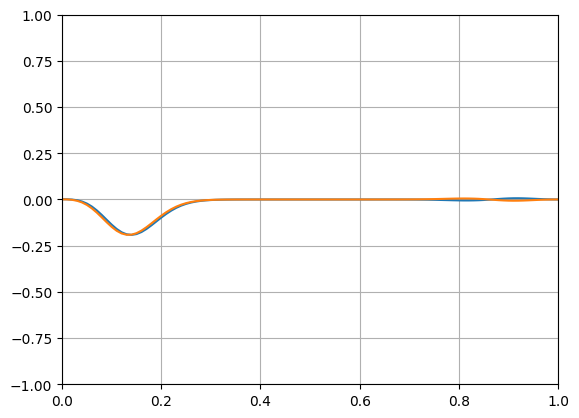

In [74]:
n = int(0.67*Nt)

plt.plot(x,Ey[:,n],x,Hz[:,n])
plt.xlim(0,1)
plt.ylim(-1,1)
plt.grid()

In [75]:
#                       ANIMACIÓN

#Animación:
T_anim =  15   #seg
num_fps = 25
num_frames = T_anim*num_fps

Coef_prop = int(Nt/num_frames)

#Definimos una función que crea un frame de la animación

fig, ax = plt.subplots()

line, = ax.plot(x,Ey[:,0])

def animate(j):
    j=Coef_prop*j
    line.set_ydata(Ey[:,j])  # update the data.
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    return line,

ani = animation.FuncAnimation(fig, animate, frames = num_frames,
                              interval=int(1/num_fps*1000), blit=True)
plt.close()

if Coef_prop < 1:
  print("La animación no puede ser tan larga. La duración máxima posible es de %i s"%(Nt/num_fps))

In [79]:
#                       ANIMACIÓN

#Animación:
T_anim =  15   #seg
num_fps = 25
num_frames = T_anim*num_fps

Coef_prop = int(Nt/num_frames)

#Definimos una función que crea un frame de la animación

fig, ax = plt.subplots()


def animate(n):
    n=Coef_prop*n
    ax.clear()
    y = ax.plot(x,Ey[:,n],x,Hz[:,n])
    ax.grid()
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    return y

ani = animation.FuncAnimation(fig, animate, frames = num_frames,
                              interval=int(1/num_fps*1000), blit=True)
plt.close()

if Coef_prop < 1:
  print("La animación no puede ser tan larga. La duración máxima posible es de %i s"%(Nt/num_fps))

In [80]:
#Esta función de matplot guarda el GIF
ani.save("Prueba14.mp4")